In [26]:
import pandas as pd
import numpy as np
import janitor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

salary_raw = pd.read_csv("Salary_dataset.csv").clean_names()
salary_raw = salary_raw[['yearsexperience', 'salary']]

print(salary_raw)


    yearsexperience    salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


In [14]:
# Descriptive Statistics
salary_raw.describe()

,yearsexperience,salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


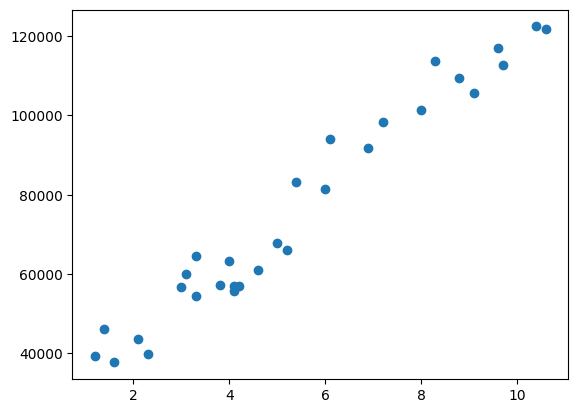

In [ ]:
# Scatter Plot - Experience vs Salary - shows clear positive correlation
plt.scatter(salary_raw['yearsexperience'], salary_raw['salary'])

In [29]:

# 1. BASIC LINEAR REGRESSION

# X is the independent variable, the 'cause' of the relationship
X = salary_raw[['yearsexperience']] 

# y is the dependent variable, the 'effect' of the relationship
y = salary_raw['salary']

#How much does y change when X changes?"
#"What's the relationship between X and y?"

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}") # the model coefficient is the gradient of the line
print(f"As experience increases by 1 year, salary increases by {model.coef_[0]:.4f}.")
print(f"Intercept: {model.intercept_:.4f}") # the model intercept is the y-axis value when X=0
print(f"The starting salary is {model.intercept_:.4f}.")

# The model equation
#The model says: "Salary = $24,380 + ($9,424 × years of experience)"
#So someone with:

#5 years experience: $24,380 + (5 × $9,424) = $71,500
#10 years experience: $24,380 + (10 × $9,424) = $71,620

Linear Regression Results:
R² Score: 0.9024
Mean Squared Error: 49830096.8559
Mean Absolute Error: 6286.4538
Coefficient: 9423.8153
As experience increases by 1 year, salary increases by 9423.8153.
Intercept: 24380.2015
The starting salary is 24380.2015.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


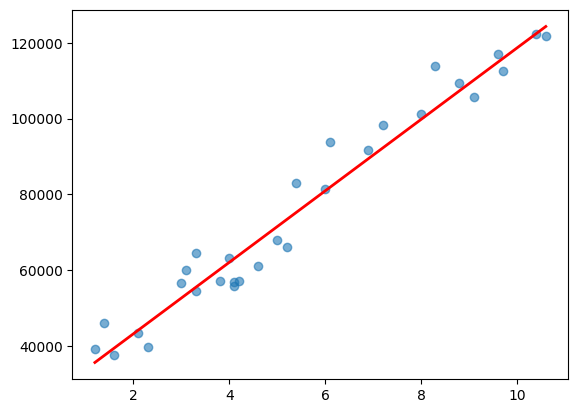

In [ ]:
plt.scatter(X, y, alpha=0.6, label='Actual Data')

# Add the regression line
X_line = np.linspace(X.min(), X.max(), 100)  # Smooth line points, draws line between min and max salary with 100 points
y_line = model.predict(X_line.reshape(-1, 1))  # Predicted values Uses your trained model to predict salary for each X_line point
X_line = X_line.reshape(-1, 1)  # Converts your 100 numbers into the format sklearn expects (column format)
# Returns 100 predicted salary values
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')